Paso 1: Librerías

In [1]:
# Librerías
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen, Request
import pandas as pd

Paso 2: Descargar html

In [2]:
# Obtener el objeto HTML de la página web
URL = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
req = Request(url=URL, headers=headers)
page = urlopen(req)

Paso 3: transformar el html

In [3]:
#Transfromar el texto html en un objeto html
html_string = page.read().decode("utf-8")
soup = bs(html_string, "html.parser")

Paso 4: Procesa el DataFrame

In [4]:
# Filtramos el html para que nos de la columna trimestral
data_html = soup.find_all("tbody")[1].find_all("td")

# Creamos 2 listas a las que le pondremos la información
fecha = []
precio = []
for i in range(0,len(data_html),2):
    fecha.append(data_html[i].text)
    precio.append(data_html[i+1].text)
# Incorporamos las listas al dataframe
tesla_df = pd.DataFrame({
    "fecha": fecha,
    "precio": precio
})

# Quitar formato a la columna 'precio'
tesla_df['precio'] = pd.to_numeric(tesla_df['precio'].str.replace('[$,]', '', regex=True))
# Dar formato a la columna 'fecha'
tesla_df['fecha'] = pd.to_datetime(tesla_df['fecha'])
# Borrar las filas incompletas
tesla_df.dropna(subset=['precio'], inplace=True)
# Ordenar ascendente
tesla_df.sort_values(by='fecha',inplace=True)

Paso 5: Almacena los datos en sqlite

In [5]:
import sqlite3 as sq

# Create the .db file
con = sq.connect('tesla.db')
# Insert the dataframe into the .db file
tesla_df.to_sql('stock_price', con, index=False, if_exists='replace')

57

Paso 6: Visualiza los datos

            GRAFICO 1: EVOLUCIÓN ANUAL DEL VALOR

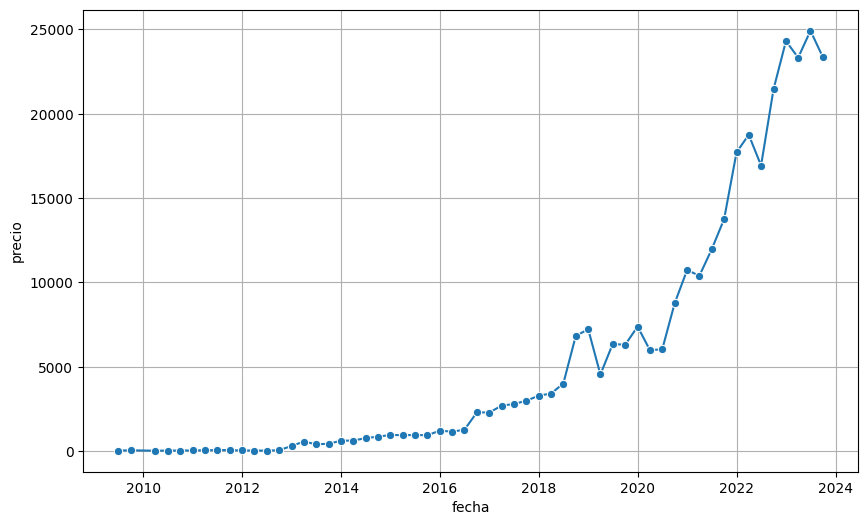

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.lineplot(tesla_df,x=tesla_df['fecha'],y=tesla_df['precio'],marker='o')
plt.grid(True)
# Mostrar el gráfico
plt.show()


            Grafico 2: Variación anual

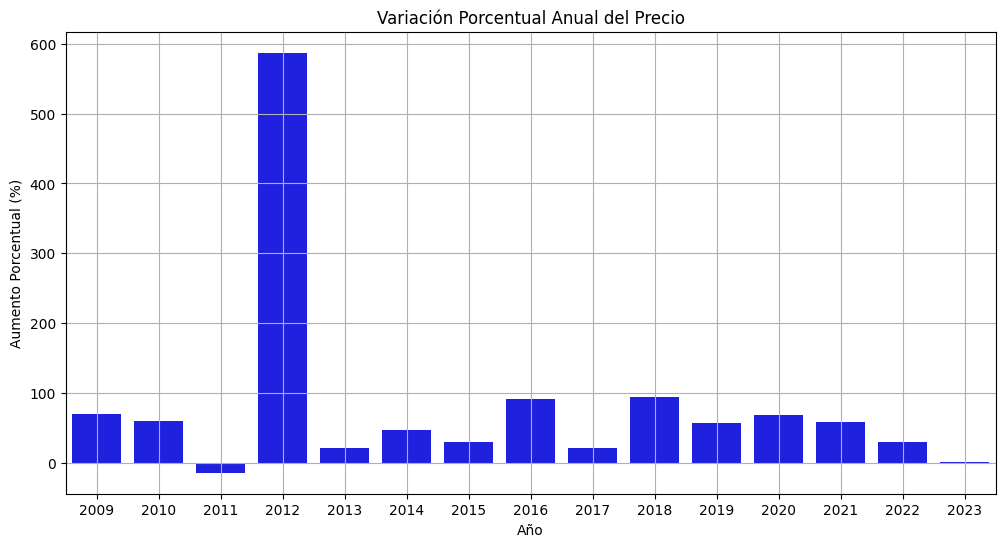

In [7]:
#Para este dataframe Se genera una tabla que anualize los cambios

# Crear una nueva columna para el año
tesla_df['año'] = tesla_df['fecha'].dt.year
# Calcular la variación porcentual anual
tesla_df['aumento_porcentual'] = tesla_df.groupby('año')['precio'].pct_change() * 100
# Crear un DataFrame nuevo anualizado
tesla_anual = tesla_df.groupby('año')['aumento_porcentual'].sum()
tesla_anual = tesla_anual.reset_index()
tesla_anual.columns = ['año', 'aumento']

# Graficar el aumento porcentual anual
plt.figure(figsize=(12, 6))
sns.barplot(data=tesla_anual, x='año', y='aumento', color='blue')
plt.title('Variación Porcentual Anual del Precio')
plt.xlabel('Año')
plt.ylabel('Aumento Porcentual (%)')
plt.grid(True)
plt.show()



            Grafico 3: 

In [12]:
tesla_df

,fecha,precio,año,aumento_porcentual
57,2009-06-30,27.0,2009,NaN
56,2009-09-30,46.0,2009,70.370370
54,2010-03-31,21.0,2010,NaN
53,2010-06-30,28.0,2010,33.333333
52,2010-09-30,31.0,2010,10.714286
51,2010-12-31,36.0,2010,16.129032
50,2011-03-31,49.0,2011,NaN
49,2011-06-30,58.0,2011,18.367347
48,2011-09-30,58.0,2011,0.000000
47,2011-12-31,39.0,2011,-32.758621


In [11]:
from datetime import datetime

month = fecha_obj.month

# Imprimir el mes de referencia
print(mes_referencia)

tesla_df['Quarter'] = cycle([])

KeyError: 'Quarter'

In [ ]:



# plt.figure(figsize=(12, 6))
# sns.barplot(data=acciones_df, x='Trimestre', y='Precio', hue='Tipo')
# plt.title('Comparación Trimestral de Precios al Inicio y al Final')
# plt.xlabel('Trimestre')
# plt.ylabel('Precio de la Acción')
# plt.show()